In [1]:
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
import matplotlib.pyplot as plt

# Análise Exploratória dos dados amostrais

A amostra utilizada nesta análise foi escolhida aleatoriamente dentro de um conjunto de amostras que pertencem ao cenário 4. Dado que todas amostras pertencentes a este cenário possuem comportamento e distribuição semelhantes considera-se que esta análise seja, num certo sentido, representativa para todas as outras amostras.

## isFraud - Variável dependente

In [2]:
amostra = pd.read_csv('amostra_39.csv')
amostra['isFraud'].value_counts() 

0    68541
1       88
Name: isFraud, dtype: int64

In [3]:
amostra['isFraud'].var()

0.0012806312496950409

In [4]:
# P(Y = 1 | X = i)

for i in amostra['action'].unique():
    f = (amostra['action'] == i)
    print(f'P(Y = 1 | X = {i}) = {sum(amostra.loc[f,"isFraud"]) / sum(f)}')

P(Y = 1 | X = CASH_IN) = 0.0
P(Y = 1 | X = PAYMENT) = 0.0
P(Y = 1 | X = TRANSFER) = 0.0009233029063057392
P(Y = 1 | X = CASH_OUT) = 0.0076362374175633465
P(Y = 1 | X = DEBIT) = 0.0


## Fraudadores - origem

In [5]:
f = (amostra['isFraud']==1)
amostra.loc[f, 'nameOrig'].value_counts() #Quantidade de fraudes por clientes

C0347245435     44
CC3242234296     1
CC9331470991     1
CC1854494645     1
CC9193119715     1
CC1592781726     1
CC6139717413     1
CC0193773329     1
CC9386205599     1
CC6940222552     1
CC1824469379     1
CC2103298718     1
CC4780826763     1
CC0090843575     1
CC8041606144     1
CC5703847008     1
CC0154986859     1
CC8065028496     1
CC7718966938     1
CC9054238793     1
CC4033667846     1
CC2521582045     1
CC1722067770     1
CC7045527483     1
CC4751651925     1
CC5017773519     1
CC2904307612     1
CC6211778336     1
CC0361731190     1
CC5877312020     1
CC2156650825     1
CC4985430273     1
CC6521302573     1
CC2278821188     1
CC1459457913     1
CC1111542001     1
CC1318979346     1
CC2260531459     1
CC8528625259     1
CC4547079479     1
CC7779145517     1
CC0570822535     1
CC8571630904     1
CC8968553136     1
CC1271081551     1
Name: nameOrig, dtype: int64

In [6]:
# P(Y = 1 | X = i) #para os maiores fraudadores

fraudadores = ['C0347245435']
for i in fraudadores:
    f = (amostra['nameOrig'] == i)
    print(f'P(Y = 1 | X = {i}) = {sum(amostra.loc[f,"isFraud"]) / sum(f)}')

P(Y = 1 | X = C0347245435) = 0.04485219164118247


## Perfil dos fraudadores - origem

In [7]:
f = amostra['nameOrig'].isin(fraudadores)
f = f & (amostra['isFraud'] == 1)
amostra.loc[f, 'action'].value_counts()

TRANSFER    44
Name: action, dtype: int64

<AxesSubplot:xlabel='nameOrig', ylabel='amount'>

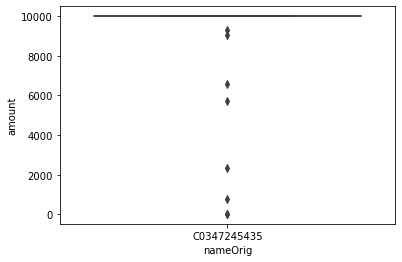

In [8]:
f = amostra['nameOrig'].isin(fraudadores)
f = f & (amostra['action'] == 'TRANSFER')
sns.boxplot(y='amount', x='nameOrig', data=amostra[f])

In [9]:
amostra.loc[f, 'amount'].value_counts() #SMURFING!!!!!!

10000.00    579
20.00         2
786.29        1
9306.04       1
2320.37       1
9038.19       1
6595.83       1
5704.35       1
Name: amount, dtype: int64

In [10]:
f = (amostra['amount'] == 10000)
amostra[f]['isFraud'].value_counts()

0    46982
1       87
Name: isFraud, dtype: int64

# Demais features

In [11]:
amostra['nameOrig'].nunique() #número de origens

180

In [12]:
amostra['nameDest'].nunique() #número de destinos

5108

In [13]:
amostra['action'].value_counts()

TRANSFER    47655
CASH_IN      9090
PAYMENT      5853
CASH_OUT     5762
DEBIT         269
Name: action, dtype: int64

In [14]:
amostra[['amount', 'oldBalanceOrig','newBalanceOrig',
         'oldBalanceDest', 'newBalanceDest']].describe()

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
count,68629.000000,6.862900e+04,6.862900e+04,6.862900e+04,6.862900e+04
mean,36532.528502,3.755703e+06,3.756089e+06,2.511809e+06,2.519280e+06
std,61428.245427,1.124643e+06,1.114121e+06,2.026681e+06,2.029452e+06
min,0.000000,-2.130811e+04,-2.130811e+04,-2.130811e+04,-1.130811e+04
25%,10000.000000,3.175896e+06,3.174795e+06,9.759530e+03,1.381031e+04
50%,10000.000000,3.725019e+06,3.720171e+06,3.061402e+06,3.071030e+06
75%,10000.000000,4.334996e+06,4.330665e+06,4.036710e+06,4.046598e+06
max,523368.790000,1.149044e+07,1.148044e+07,1.149044e+07,1.149044e+07


# Resultados

In [17]:
results = pd.read_csv('resultados_preliminares_resultado_1.csv.csv')
results.head(10)

,AUC,RECALL,F1,F2,TN,FN,FP,TP,MODEL,N_NEG,N_POS,AMOSTRA
0,0.941651,0.954290,0.711510,0.839684,11883,57,908,1190,LogClass,12791,1247,resultado_1
1,0.997047,0.995188,0.992006,0.993913,12777,6,14,1241,RF,12791,1247,resultado_1
2,0.923155,0.854050,0.883451,0.865572,12692,182,99,1065,MLP,12791,1247,resultado_1
3,0.815958,0.631917,0.774447,0.682133,12791,459,0,788,SVM,12791,1247,resultado_1
4,0.999247,0.999198,0.996003,0.997918,12782,1,9,1246,XGB,12791,1247,resultado_1
5,0.938536,0.955079,0.719604,0.844537,11961,65,1012,1382,LogClass,12973,1447,resultado_10
6,0.996426,0.994471,0.990024,0.992688,12952,8,21,1439,RF,12973,1447,resultado_10
7,0.899034,0.833449,0.775064,0.809070,12514,241,459,1206,MLP,12973,1447,resultado_10
8,0.782308,0.564616,0.721731,0.618471,12973,630,0,817,SVM,12973,1447,resultado_10
9,0.998771,0.997927,0.997238,0.997651,12968,3,5,1444,XGB,12973,1447,resultado_10


<AxesSubplot:xlabel='N_POS', ylabel='Count'>

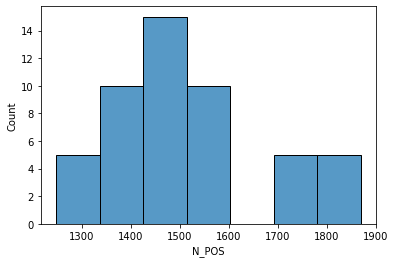

In [18]:
sns.histplot(data=results, x='N_POS')

In [19]:
results.drop(['AMOSTRA',
              'FN','FP','TN','TP',
              'N_NEG','N_POS'], axis=1, inplace=True)
results.groupby('MODEL').mean()


,AUC,RECALL,F1,F2
MODEL,,,,
LogClass,0.937282,0.943494,0.738184,0.846902
MLP,0.892993,0.795380,0.847658,0.814674
RF,0.997013,0.995360,0.992334,0.994146
SVM,0.794165,0.588330,0.739895,0.640729
XGB,0.998827,0.998304,0.996530,0.997593


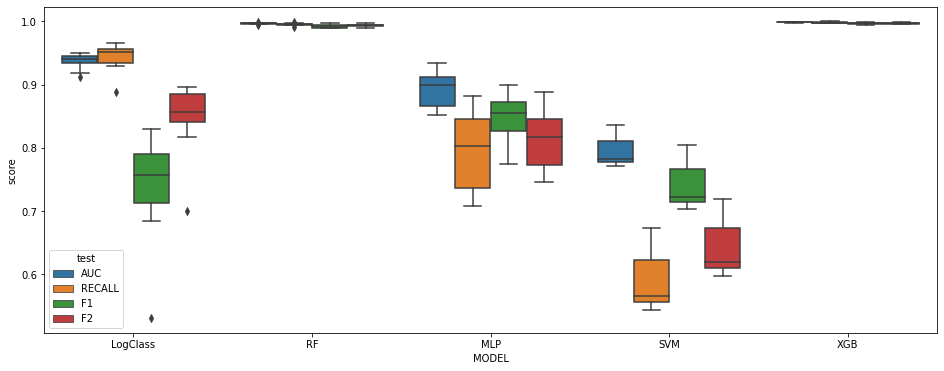

In [20]:
melt_results = results.melt(id_vars='MODEL', var_name='test', value_name='score')

fig, ax = plt.subplots(figsize=[16,6])
sns.boxplot(x='MODEL', y='score', hue='test', data=melt_results, ax=ax);

## Modelo Logístico

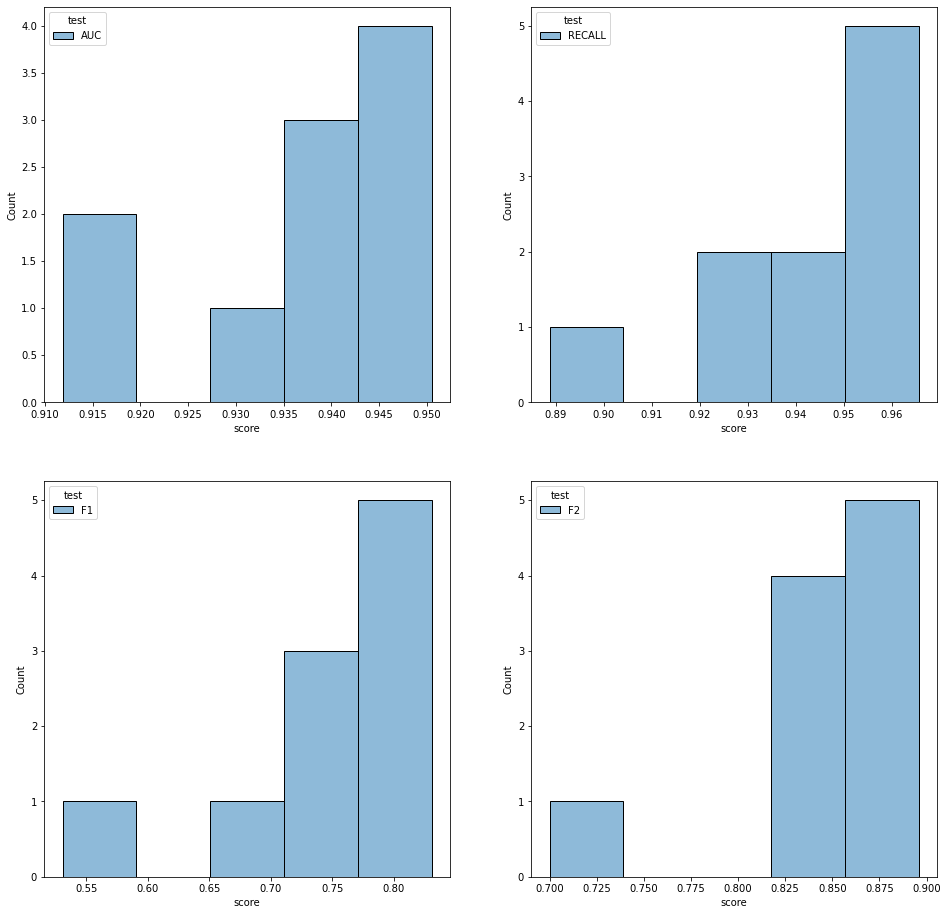

In [22]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['MODEL'] == 'LogClass'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='RECALL')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);

# Random Forests

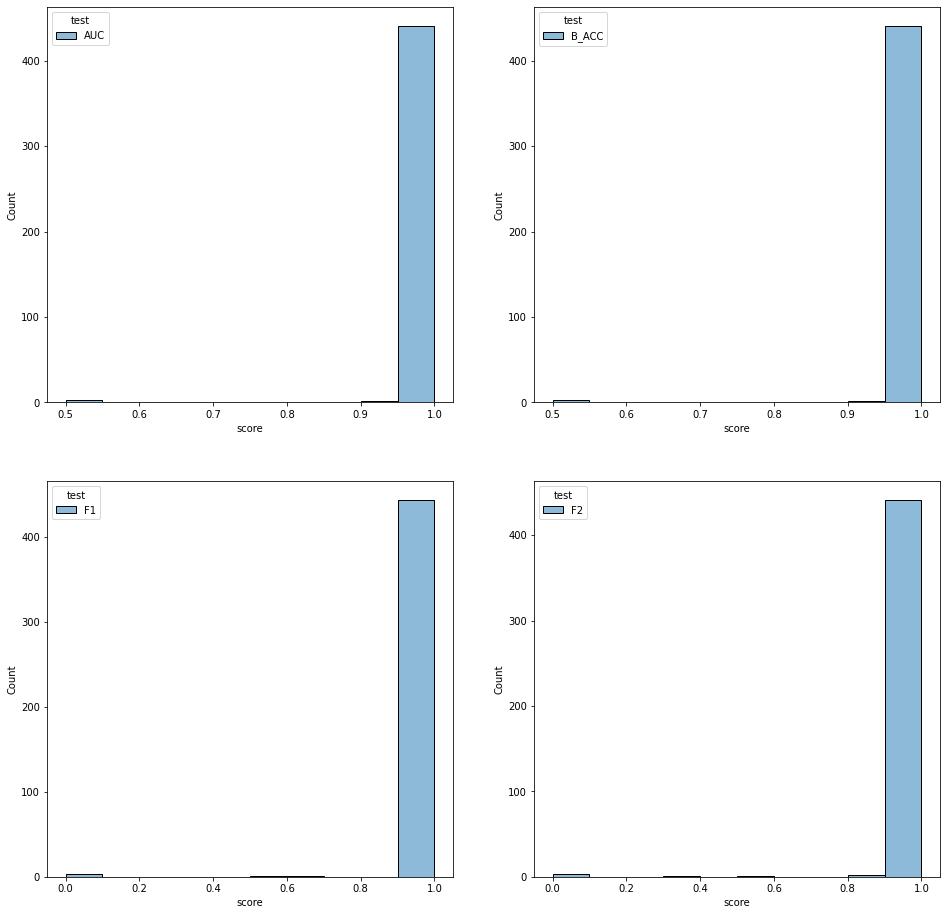

In [17]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'RF'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);

## MLP

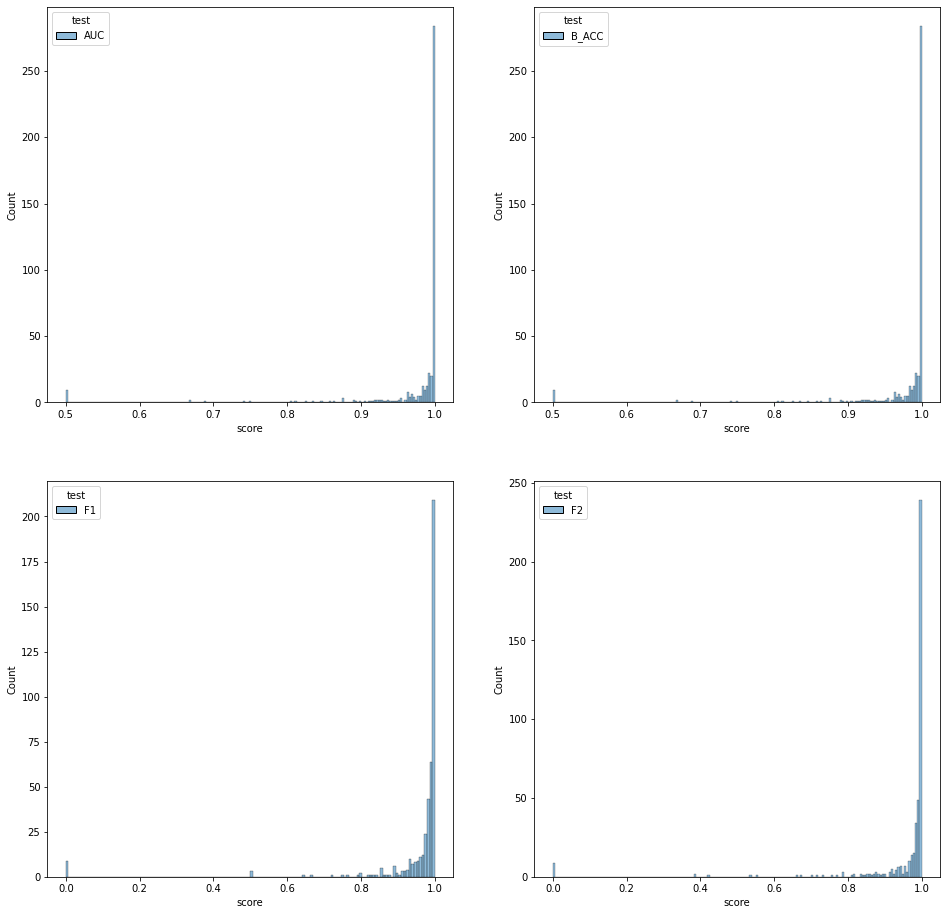

In [18]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'MLP'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);

## XGB

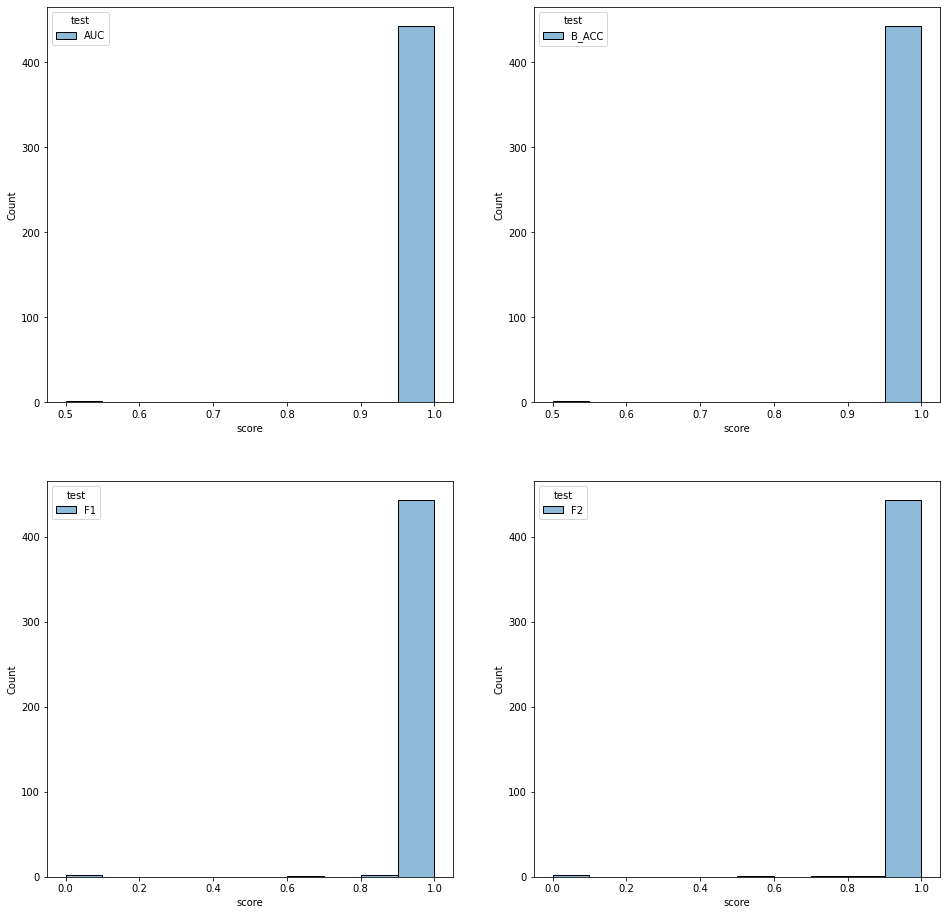

In [19]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'XGB'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);

## SVM

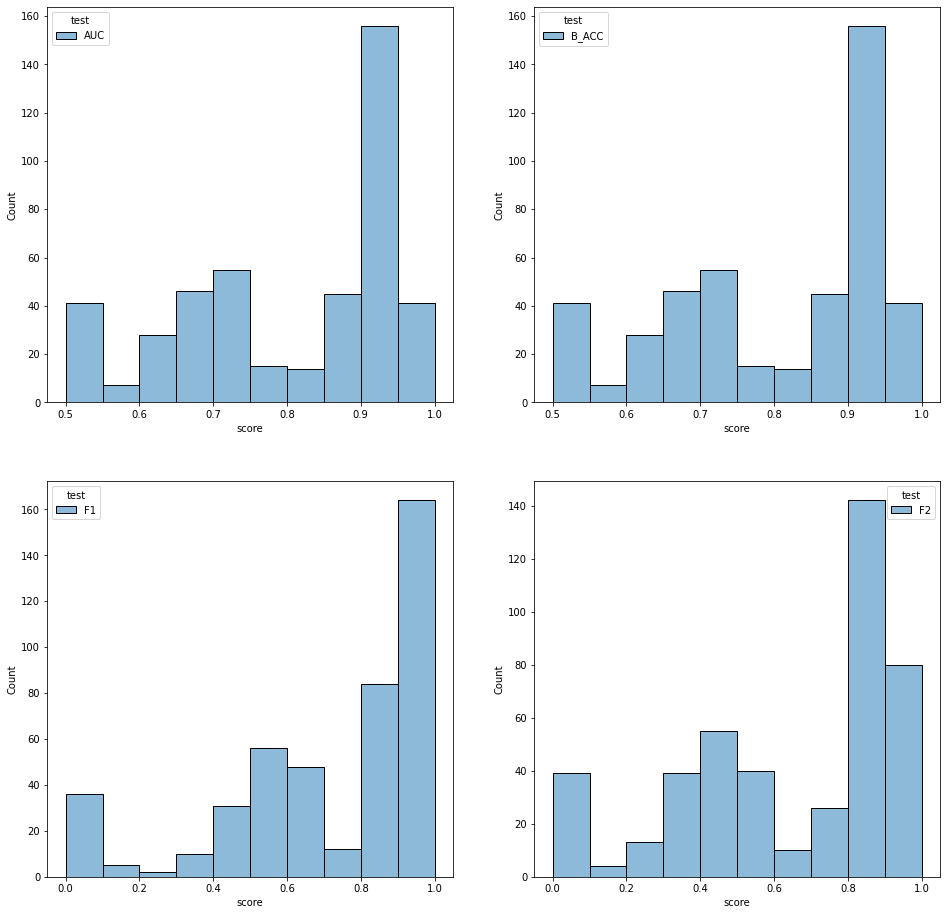

In [20]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'SVM'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);